## Wojciech Poniewierka 402224

# Laboratory 1 - Random data visualisation and sampling


<br><br><br><br>
Import libraries and set global random generator

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

RNG = np.random.default_rng()

In [2]:
# 1000 samples of uniform distribution on interval [0, 1]
uniform = RNG.uniform(0, 1, size=1000)

# 1000 samples of normal distribution with mean 0 and standard deviation 1
normal = RNG.normal(0, 1, size=1000)

# 1000 samples of normal distribution with mean 0 and standard deviation 10
normal10 = RNG.normal(0, 10, size=1000)

# 1000 samples of beta distribution for the following pairs of parameters (a, b) in (1,1) (2,2) (3,9)
beta11 = RNG.beta(1, 1, size=1000)
beta22 = RNG.beta(2, 2, size=1000)
beta39 = RNG.beta(3, 9, size=1000)

# 10000 samples of two-dimensional normal distributions with given parameters
mean = np.array([0, 0])
cov1 = np.array([[1, 0],
                 [0, 1]])
cov2 = np.array([[2, 1],
                 [1, 2]])
normal_2d_cov1 = RNG.multivariate_normal(mean, cov1, size=10000)
normal_2d_cov2 = RNG.multivariate_normal(mean, cov2, size=10000)

In [3]:
def plot_hist(array, v, ideal_dist, title, bins='auto'):
  plt.hist(array, bins, density=True, label='Sampled')
  plt.plot(v, ideal_dist, label='PDF')
  plt.title(title)
  plt.grid()
  plt.xlabel('Value')
  plt.ylabel("Count")
  plt.legend()

def normal_dist(vect, mu, std):
  return np.exp(-0.5 * np.power( ((vect - mu) / std), 2)) / (std * np.sqrt(2*np.pi))

## Below are plots for sampled values and ideal values of probability density function

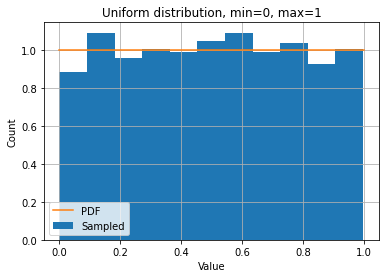

In [4]:
ideal = np.array([1 / (1 - 0)] * 2)
plot_hist(uniform, np.array([0, 1]), ideal, "Uniform distribution, min=0, max=1")

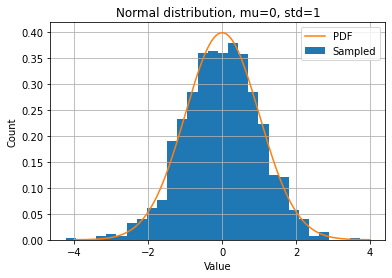

In [5]:
v = np.linspace(-4, 4, 1000)
plot_hist(normal, v, normal_dist(v, 0, 1), "Normal distribution, mu=0, std=1")

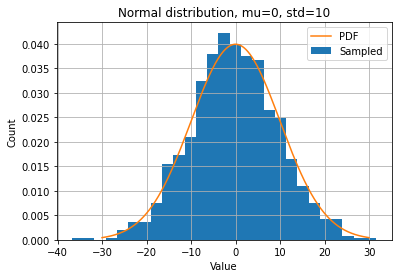

In [6]:
v = np.linspace(-30, 30, 1000)
plot_hist(normal10, v, normal_dist(v, 0, 10), "Normal distribution, mu=0, std=10")

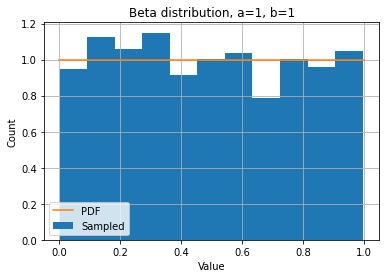

In [7]:
v = np.linspace(0, 1, 1000)
pdf11 = stats.beta.pdf(v, 1, 1)
plot_hist(beta11, v, pdf11, "Beta distribution, a=1, b=1")

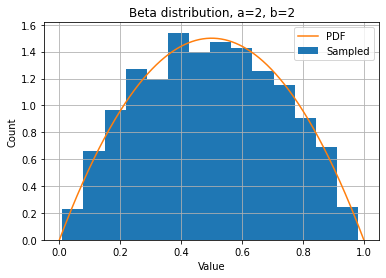

In [8]:
v = np.linspace(0, 1, 1000)
pdf22 = stats.beta.pdf(v, 2, 2)
plot_hist(beta22, v, pdf22, "Beta distribution, a=2, b=2")

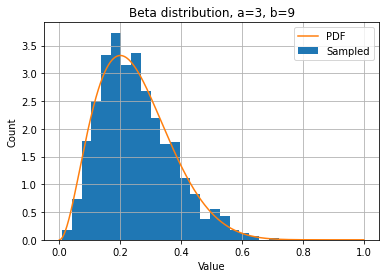

In [9]:
v = np.linspace(0, 1, 1000)
pdf39 = stats.beta.pdf(v, 3, 9)
plot_hist(beta39, v, pdf39, "Beta distribution, a=3, b=9")

## Below are plots for 2d distributions with different number of bins in histogram

In [10]:
def plot_hist2d(mat, bins):
    fig, ax = plt.subplots()
    ax.set_aspect("equal")
    hist = ax.hist2d(mat[:,0], mat[:,1], bins=bins)
    ax.set_title(f"2D normal distribution, {bins} bins")
    ax.set_xlabel('Value x')
    ax.set_ylabel('Value y')
    fig.colorbar(hist[3], ax=ax)

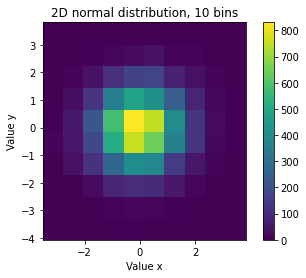

In [11]:
plot_hist2d(normal_2d_cov1, 10)

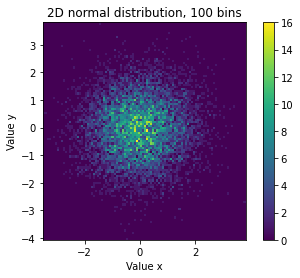

In [12]:
plot_hist2d(normal_2d_cov1, 100)

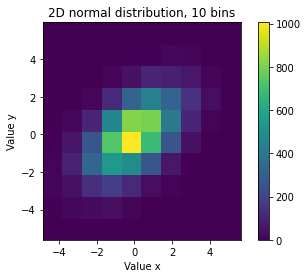

In [13]:
plot_hist2d(normal_2d_cov2, 10)

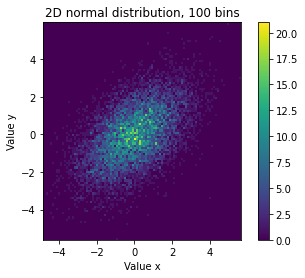

In [14]:
plot_hist2d(normal_2d_cov2, 100)

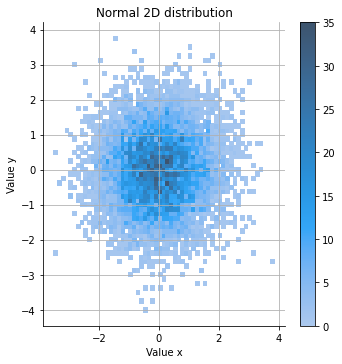

In [15]:
# Make histograms using seaborn
import seaborn as sns
import pandas as pd

df_cov1 = pd.DataFrame(normal_2d_cov1, columns=["Value x", "Value y"])
df_cov2 = pd.DataFrame(normal_2d_cov2, columns=["Value x", "Value y"])

sns.displot(df_cov1, x="Value x", y="Value y", cbar=True)
plt.title("Normal 2D distribution")
plt.grid()

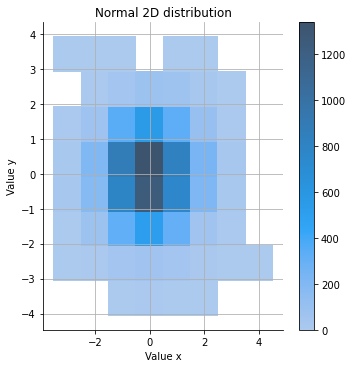

In [16]:
sns.displot(df_cov1, x="Value x", y="Value y", binwidth=(1, 1), cbar=True)
plt.title("Normal 2D distribution")
plt.grid()

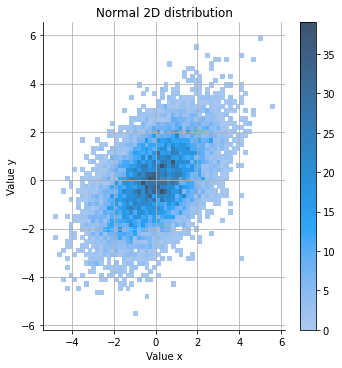

In [17]:
sns.displot(df_cov2, x="Value x", y="Value y", cbar=True)
plt.title("Normal 2D distribution")
plt.grid()

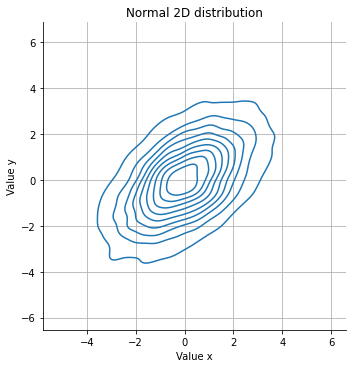

In [18]:
sns.displot(df_cov2, x="Value x", y="Value y", kind='kde')
plt.title("Normal 2D distribution")
plt.grid()

# Excercise 5 and 6

In [19]:
length = 1000

sigma = np.abs(RNG.normal(0, 1, size=length))
alfa = RNG.normal(2, 0.1, size=length)
beta = RNG.normal(0.2, 0.2, size=length)
x = RNG.normal(0, 3, size=length)
mu = alfa + beta * x

y = RNG.normal(mu, sigma)

(-6.0, 6.0)

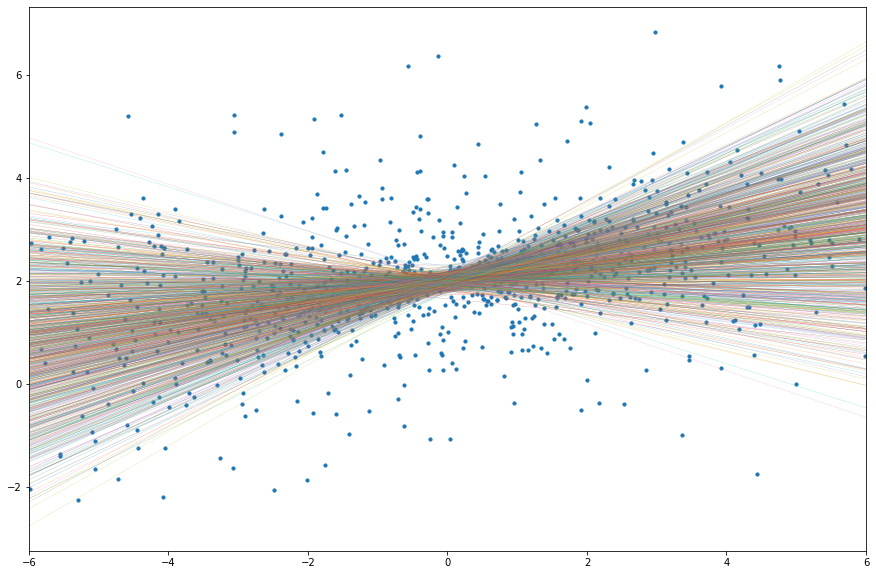

In [20]:
fig, ax = plt.subplots()
fig.set_size_inches((15, 10))
ax.scatter(x, y, s=10)

v = np.linspace(-6, 6).reshape((-1, 1))
ax.plot(np.ones((1, length)) * v, alfa + v * beta, linewidth=0.15)
ax.set_xlim([-6, 6])